# Predicting Pima Diabetes

## Importing Libraries

In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline 

## Load and review data

In [35]:
df = pd.read_csv('./data/pima-data.csv')

df.shape

(768, 10)

In [36]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [37]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features
From the metadata on the data source we have the following definition of the features.

| Feature  | Description | Comments |
|--------------|-------------|--------|
| num_preg     | number of pregnancies         | 0 is valid
| glucose_conc | Plasma glucose concentration a 2 hours in an oral glucose tolerance test         |
| diastolic_bp | Diastolic blood pressure (mm Hg) |
| thickness | Triceps skin fold thickness (mm) |
|insulin | 2-Hour serum insulin (mu U/ml) |
| bmi |  Body mass index (weight in kg/(height in m)^2) |
| diab_pred |  Diabetes pedigree function |
| Age (years) | Age (years)|
| skin | ???? | What is this? |
| diabetes | Class variable (1=True, 0=False) |  Why is our data boolean (True/False)? |


## Check for null values

In [38]:
df.isnull().values.any()

False

## Correlated features

In [39]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

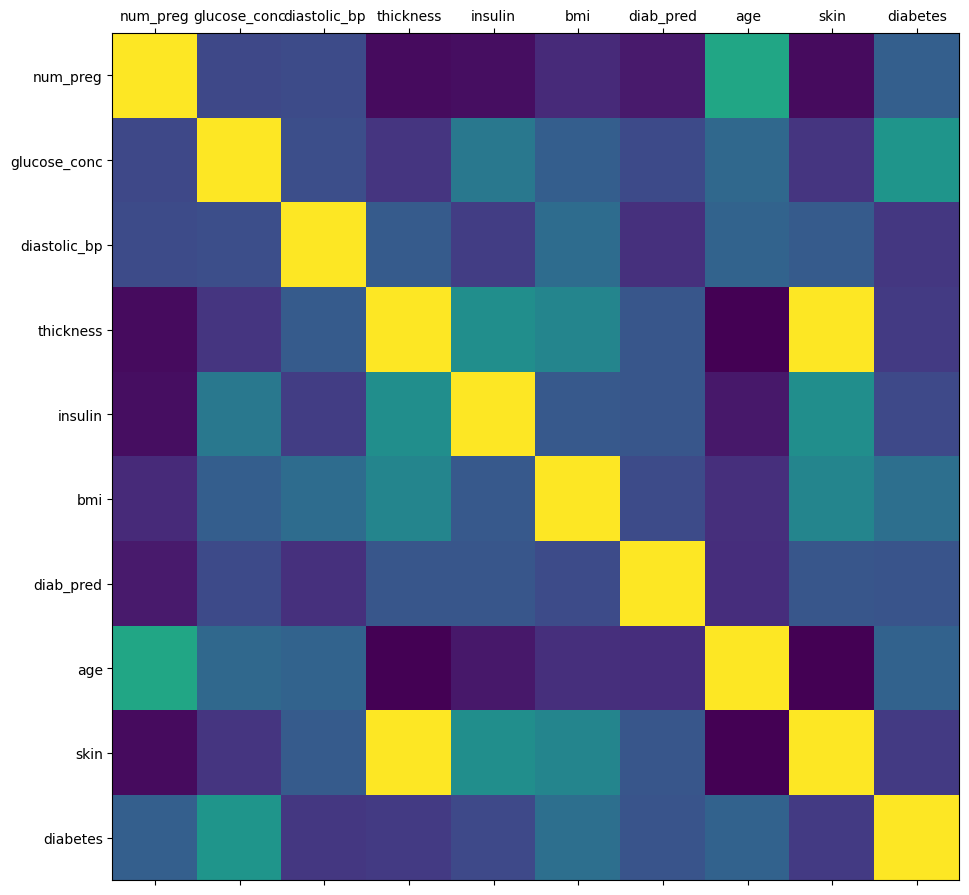

In [40]:
plot_corr(df)

In [41]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [42]:
del df['skin']

In [43]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


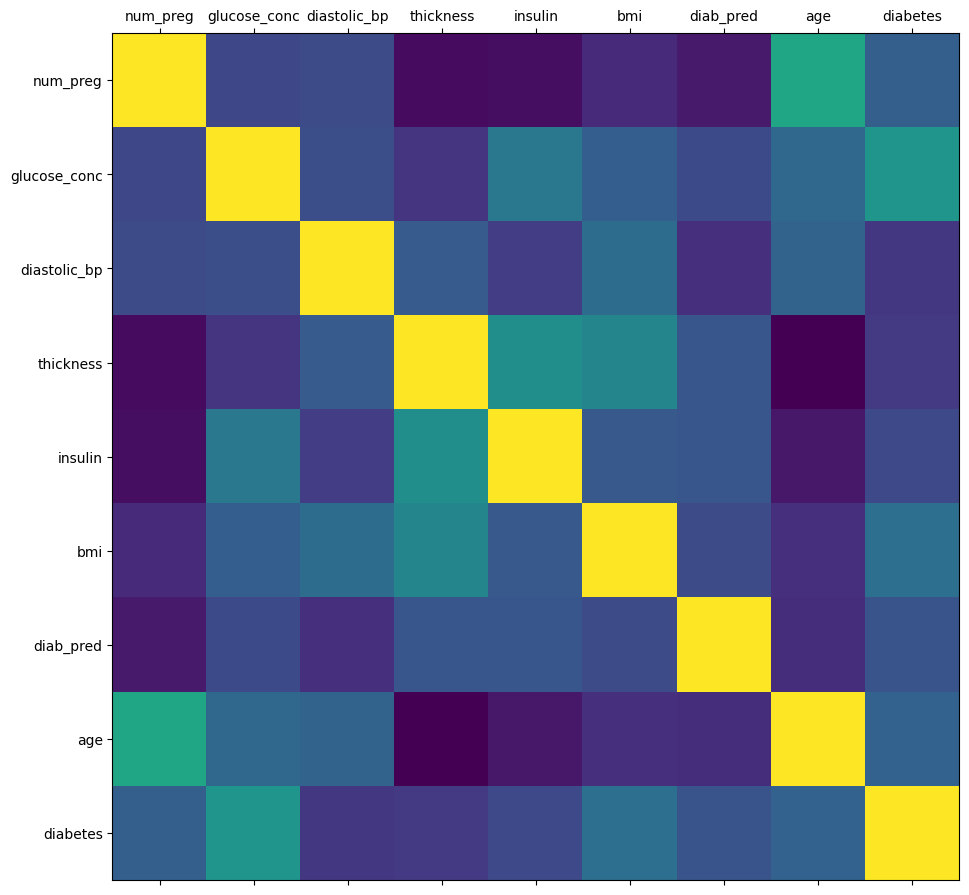

In [44]:
plot_corr(df)

## Check data types

In [45]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1, False to 0

In [46]:
diabetes_map = {True: 1, False: 0}

In [47]:
df['diabetes']=df['diabetes'].map(diabetes_map)

In [48]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check true/false ratio

In [49]:
num_obs = len(df)
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


### Splitting the data

70% into training, 30% into test

In [50]:
from sklearn.model_selection import train_test_split
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness','insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)


We check to ensure we have the desired 70% train, 30% test split of the data

In [51]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


### Verifying predicted value was split correctly

In [52]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train['diabetes'] == 1]), (len(y_train[y_train['diabetes'] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train['diabetes'] == 0]), (len(y_train[y_train['diabetes'] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test['diabetes'] == 1]), (len(y_test[y_test['diabetes'] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test['diabetes'] == 0]), (len(y_test[y_test['diabetes'] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Post-split Data Preparation

### Hidden Missing Values

In [ ]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values possible?

How many rows have unexpected 0 values?

In [ ]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


#### Impute with the mean

In [ ]:
from sklearn.impute import SimpleImputer

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values = 0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Training Initial Algorithm - Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# create Guassian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

### Performance on training data

In [ ]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7542



### Performance on testing data

In [ ]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.7359



#### Metrics

In [ ]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

### Performance on training data

In [ ]:
rf_predict_train = rf_model.predict(X_train)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print()

Accuracy: 1.0000



### Performance on test data

In [ ]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))
print()

Accuracy: 0.7403



### Metrics

In [53]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[119  32]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print()
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7619

Confusion Matrix
[[128  23]
 [ 32  48]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       151
           1       0.68      0.60      0.64        80

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



Setting regularization parameter

1st max value of 0.625 occured at C=1.100


Text(0, 0.5, 'recall score')

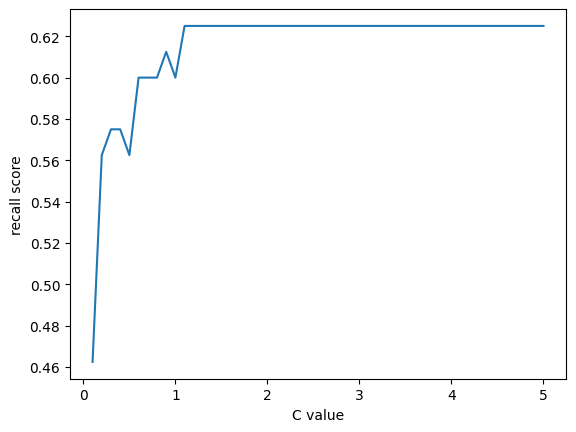

In [63]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

### Logistic regression with class_weight='balanced'

1st max value of 0.800 occured at C=0.200


Text(0, 0.5, 'recall score')

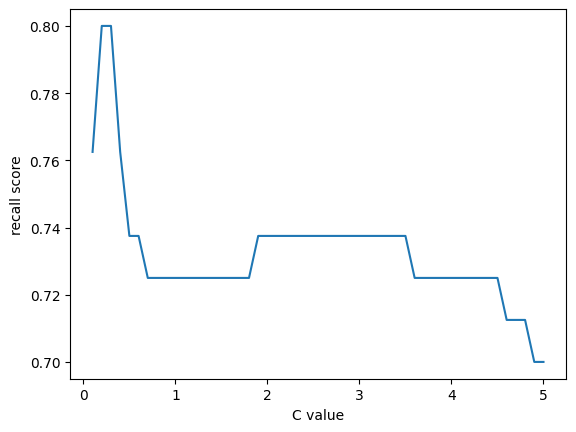

In [64]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear', class_weight='balanced')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.2, random_state=42, class_weight='balanced' solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)